# Ridge Regression. 

## Theory
1. Destignation

    $a=\left( {{a}_{1}}\text{ }...\text{  }{{a}_{l}} \right)$ - prediction

    $y=\left( {{y}_{1}}\text{ }...\text{  }{{y}_{l}} \right)$ - - target

    $X=\left( \begin{align}
     & 1\text{  }{{x}_{11}}\text{ }....\text{  }{{x}_{1d}} \\ 
     & 1\text{      }....... \\ 
     & 1\text{      }....... \\
     & 1\text{  }{{x}_{l1}}\text{ }....\text{   }{{x}_{ld}} \\ 
    \end{align} \right)$ - features

    $w=\left( \begin{align}
     & {{w}_{0}} \\ 
     & {{w}_{1}} \\ 
     & ... \\ 
     & {{w}_{d}} \\ 
    \end{align} \right)$ - weights

    $a=Xw=np.dot(X,w)$ - prediction

    $Q(w,X)=\frac{1}{2l}||Xw-y|{{|}^{2}}+\frac{\lambda }{2}||w|{{|}^{2}}$   - loss function


2. Standartization

    ${{\mu }_{j}}=\frac{1}{l}\sum\limits_{i=1}^{l}{x_{i}^{j}}$

    ${{\mu }}=np.mean(X, axis=0)$

    ${{\sigma }_{j}}=\sqrt{\frac{1}{l}\sum\limits_{i=1}^{l}{{{\left( x_{i}^{j}-{{\mu }_{j}} \right)}^{2}}}}$
    
    ${\sigma }=np.std(X, axis=0)$
    
    $X:=\frac{X-{{\mu }}}{{\sigma }}$
    
    
3. Optimiztation

    $Q(w,X)\to \min$
    
    $\frac{\partial Q}{\partial w}=\frac{1}{l}\left( a-y \right)\cdot \frac{\partial a}{\partial w}+\lambda w=\frac{1}{l}\left( a-y \right)X+\lambda w$
 
    $w:=w-\alpha \frac{\partial Q}{\partial w}$
    
    
4. Analytical solution

    $\begin{align}
      & Q=||Xw-y|{{|}^{2}}+\lambda ||w|{{|}^{2}}\to \min  \\ 
      & Q={{\left( Xw-y \right)}^{T}}\left( Xw-y \right)+\lambda {{w}^{T}}w \\ 
      & \frac{\partial Q}{\partial w}={{X}^{T}}\left( Xw-y \right)+\lambda w=0 \\ 
      & {{X}^{T}}Xw-{{X}^{T}}y+\lambda w=0 \\ 
      & w={{\left( {{X}^{T}}X+\lambda I \right)}^{-1}}{{X}^{T}}y \\ 
    \end{align}$

    

## Practice

### 1) Data Analysis

In [40]:
# Import libs and dataset

# Snadard libs
import pandas as pd
import numpy as np
import seaborn as sns
import random
import sys

from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score as sklearn_r2
from matplotlib import pyplot as plt

# My libs
sys.path.append('../../')

from ridge import Ridge
from mltools.preprocessing import *
from mltools.metrics import r2_score as my_r2

# Set seaborn style
sns.set()

In [41]:
# Load data
boston_dataset = load_boston()

# Print description
print(boston_dataset.DESCR)

# Build dataframe
df_boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df_boston.insert(0, '__constant', 1) 

# Create matrix of features and target vector
X = df_boston.values
y = boston_dataset.target

# Add target to df
df_boston['target'] = y
df_boston.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,__constant,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\Users\Anatoly\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


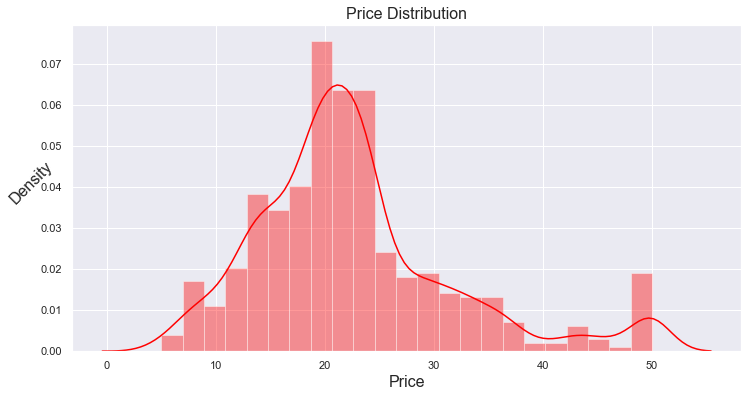

In [42]:
# Target distribution 
target = y

plt.figure(figsize=(12,6))
plt.xlabel('Price', fontsize=16)
plt.ylabel('Density', fontsize=16, rotation=45)
plt.title('Price Distribution', fontsize=16)
sns.distplot(target, color='red')
plt.show()

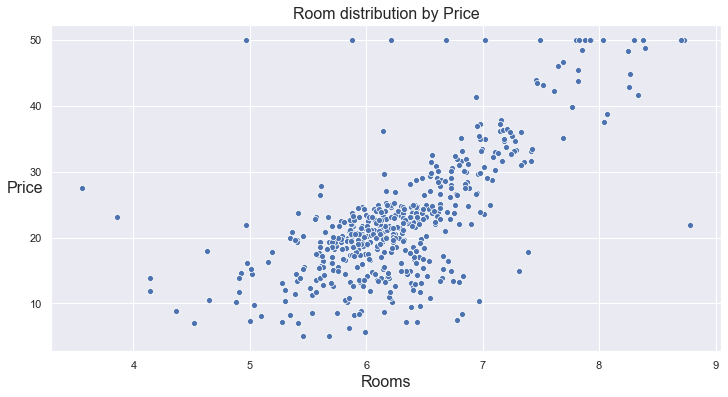

In [43]:
# Room distribution by Price

plt.figure(figsize=(12,6))
plt.title('Room distribution by Price', fontsize=16)
sns.scatterplot(x='RM', y="target", data=df_boston)
plt.xlabel('Rooms', fontsize=16)
plt.ylabel('Price', fontsize=16, rotation=0, verticalalignment='center')
plt.show()

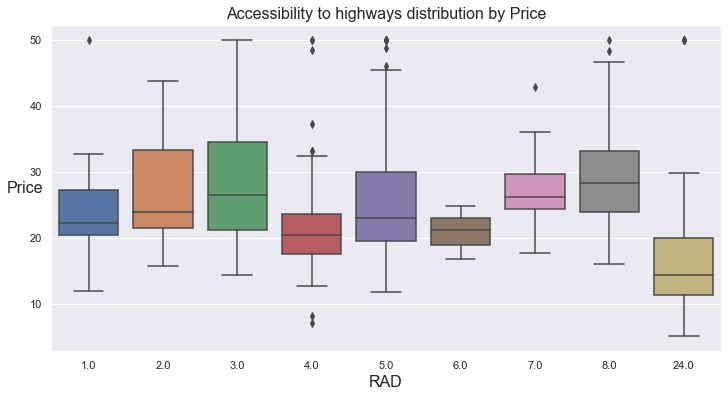

In [44]:
# Accessibility to highways distribution by Price

plt.figure(figsize=(12,6))
plt.title('Accessibility to highways distribution by Price', fontsize=16)
sns.boxplot(x='RAD', y="target", data=df_boston)
plt.xlabel('RAD', fontsize=16)
plt.ylabel('Price', fontsize=16, rotation=0, verticalalignment='center')
plt.show()

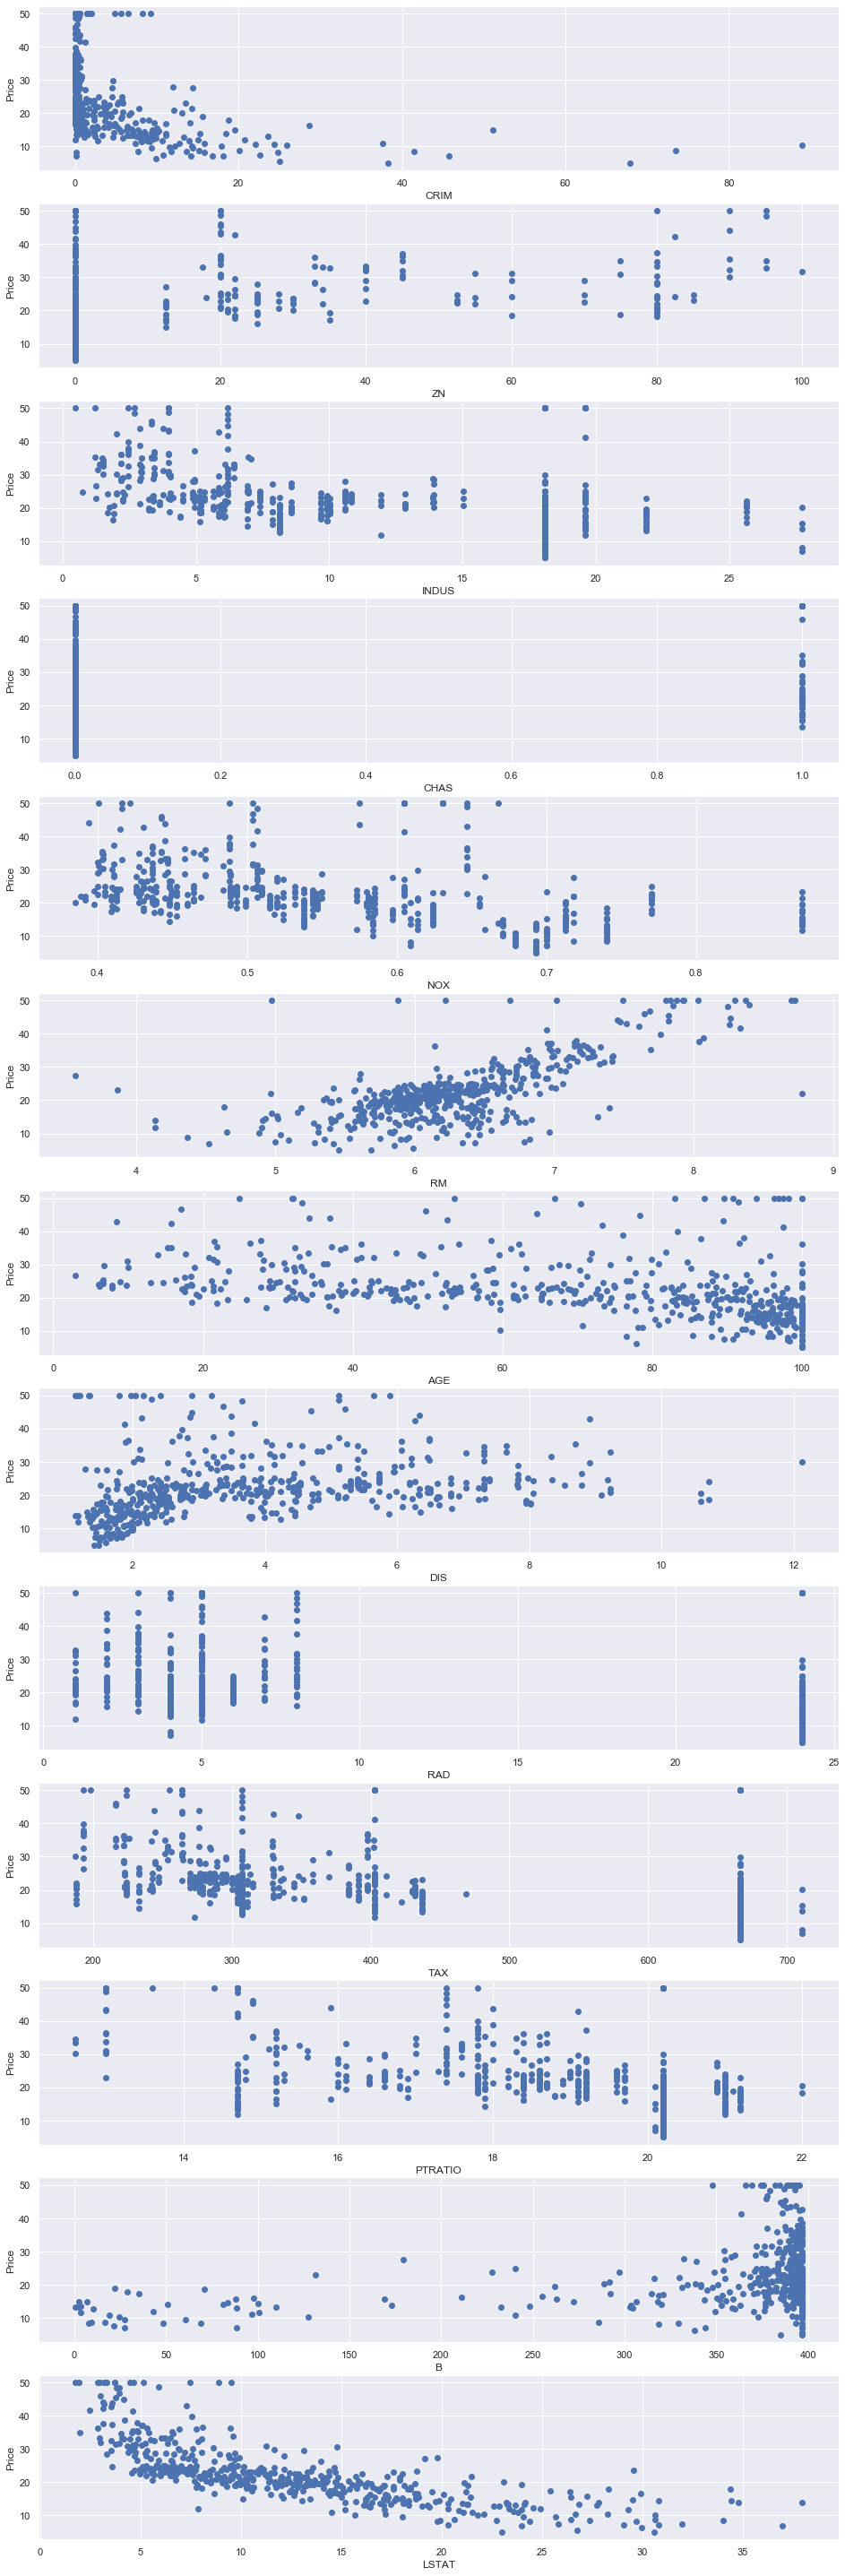

In [45]:
# All distributions
n_plots = df_boston.shape[1] - 2

fig, axes = plt.subplots(n_plots, 1, figsize=(16, 4*n_plots))
for i in range(n_plots):
    xi = df_boston.iloc[:, i+1].values
    axes[i].set_xlabel(df_boston.columns[i+1])
    axes[i].set_ylabel('Price')
    axes[i].plot(xi, y, 'o')


### 2) Data Cleaning

In [46]:
# Delete ~1% of data

q_99 = np.quantile(X, 0.995, axis=0)
q_01 = np.quantile(X, 0.005, axis=0)

indx_to_del = set()
for i in range(X.shape[1]):
    indx_to_del = indx_to_del | set(list(np.where(X[:,i] > q_99[i])[0]))
    indx_to_del = indx_to_del | set(list(np.where(X[:,i] < q_01[i])[0]))

indx_to_save = set(range(X.shape[0])) - indx_to_del
indx_to_save = sorted(list(indx_to_save))

X_clean = X[indx_to_save]
y_clean = y[indx_to_save]

print(f"Shape before cleaning {X.shape}\nShape after  cleaning {X_clean.shape}")

Shape before cleaning (506, 14)
Shape after  cleaning (468, 14)


### 3) Train/dev/test split

In [47]:
sets = Splitter().split(X_clean, y_clean)

X_train = sets['train']['X']
X_dev = sets['dev']['X']
X_test = sets['test']['X']

y_train = sets['train']['y']
y_dev = sets['dev']['y']
y_test = sets['test']['y']

### 4) Standartization

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_dev_scale = scaler.transform(X_dev)
X_test_scale = scaler.transform(X_test)

### 5) Model

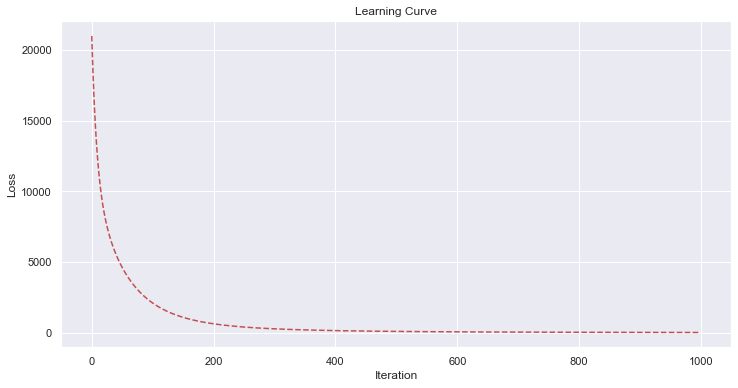

In [49]:
# Init model
ridge = Ridge(alpha=0.1)

# Fit model
ridge.fit(X_train_scale, y_train)

#Plot learning curve
ridge.plot_learning_curve('r--')

### 6) Prediction

In [50]:
y_dev_pred = ridge.predict(X_dev_scale)

### 7) Comparison with sklearn

In [51]:
# Init sklearn Ridge
ridge_sklrn = linear_model.Ridge()

# Fit and predict
ridge_sklrn.fit(X_train_scale, y_train)
y_dev_pred_sklrn = ridge_sklrn.predict(X_dev_scale)

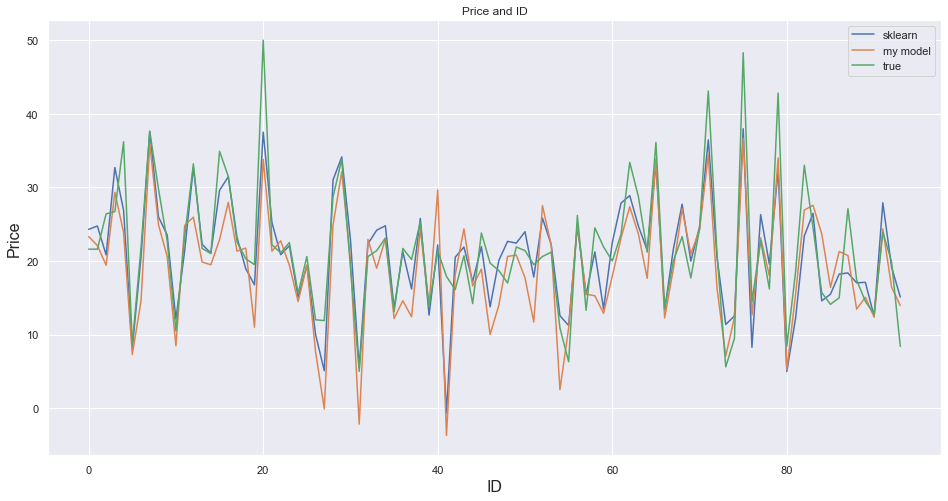

In [52]:
# Plot target curve
predicted_obj = range(len(y_dev_pred))

plt.figure(figsize=(16,8))
plt.title('Price and ID')
plt.xlabel('ID', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.plot(predicted_obj, y_dev_pred_sklrn, label='sklearn')
plt.plot(predicted_obj, y_dev_pred, label='my model')
plt.plot(predicted_obj, y_dev, label='true')
plt.legend()
plt.show()

### 8) R2 score

In [53]:
# Check my realization and sklearn
assert my_r2(y_dev_pred, y_dev) == sklearn_r2(y_dev_pred, y_dev), 'Bad realization of R2'

# Calculate R2 score
r2_model = my_r2(y_dev, y_dev_pred)
r2_sklrn = my_r2(y_dev, y_dev_pred_sklrn)
print(f'R2 score of my model = {r2_model}\nR2 score of sklearn  = {r2_sklrn}')

R2 score of my model = 0.5641932919921142
R2 score of sklearn  = 0.7322772726204319
